## Learning Rate Finder

In [ ]:
%matplotlib inline
from fastai.gen_doc.nbdoc import *
from fastai.vision import *
from fastai.callbacks import *

Learning rate finder plots lr vs loss relationship for a [`Learner`](/basic_train.html#Learner). The idea is to reduce the amount of guesswork on picking a good starting learning rate.

**Overview:**  
1. First run lr_find `learn.lr_find()`
2. Plot the learning rate vs loss `learn.recorder.plot()`
3. Pick a learning rate before it diverges then start training

**Technical Details:** (first [described]('https://arxiv.org/abs/1506.01186') by Leslie Smith)  
>Train [`Learner`](/basic_train.html#Learner) over a few iterations. Start with a very low `start_lr` and change it at each mini-batch until it reaches a very high `end_lr`. [`Recorder`](/basic_train.html#Recorder) will record the loss at each iteration. Plot those losses against the learning rate to find the optimal value before it diverges.

## Choosing a good learning rate

For a more intuitive explanation, please check out [Sylvain Gugger's post](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html)

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
def simple_learner(): return Learner(data, simple_cnn((3,16,16,2)), metrics=[accuracy])
learn = simple_learner()

First we run this command to launch the search:

In [ ]:
show_doc(Learner.lr_find)

<h4 id="lr_find"><code>lr_find</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L24" class="source_link">[source]</a></h4>

> <code>lr_find</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`start_lr`**:`Floats`=***`1e-07`***, **`end_lr`**:`Floats`=***`10`***, **`num_it`**:`int`=***`100`***, **`stop_div`**:`bool`=***`True`***, **`wd`**:`float`=***`None`***)

Explore lr from `start_lr` to `end_lr` over `num_it` iterations in `learn`. If `stop_div`, stops when loss diverges.  

In [ ]:
learn.lr_find(stop_div=False, num_it=200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Then we plot the loss versus the learning rates. We're interested in finding a good order of magnitude of learning rate, so we plot with a log scale. 

Min numerical gradient: 1.00E-02


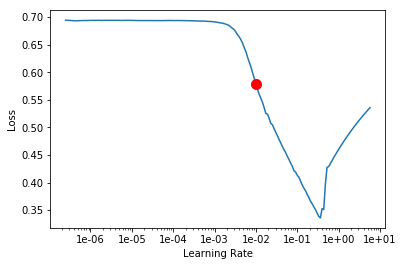

In [ ]:
learn.recorder.plot()
min_grad_lr = learn.recorder.min_grad_lr

Then, we choose a value that is approximately in the middle of the sharpest downward slope. This is given as an indication by the LR Finder tool, so let's try 1e-2.

In [ ]:
simple_learner().fit(2, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.076788,0.049371,0.984298
2,0.043127,0.026523,0.989696


Don't just pick the minimum value from the plot!

In [ ]:
learn = simple_learner()
simple_learner().fit(2, 1e-0)

epoch,train_loss,valid_loss,accuracy
1,1.347017,0.693147,0.495584
2,0.706133,0.693147,0.495584


Picking a value before the downward slope results in slow training:

In [ ]:
learn = simple_learner()
simple_learner().fit(2, 1e-3)

epoch,train_loss,valid_loss,accuracy
1,0.164522,0.134803,0.953876
2,0.117761,0.119804,0.962218


#### Suggested LR
The red dot on the graph is the point with the minimum numerical gradient.  We can use that point as a first guess for an LR

In [ ]:
learn = simple_learner()
simple_learner().fit(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy
1,0.092473,0.061094,0.977920
2,0.043299,0.064644,0.975957


In [ ]:
show_doc(LRFinder)

<h2 id="LRFinder"><code>class</code> <code>LRFinder</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L9" class="source_link">[source]</a></h2>

> <code>LRFinder</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`start_lr`**:`float`=***`1e-07`***, **`end_lr`**:`float`=***`10`***, **`num_it`**:`int`=***`100`***, **`stop_div`**:`bool`=***`True`***) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

Causes `learn` to go on a mock training from `start_lr` to `end_lr` for `num_it` iterations.  

### Callback methods

You don't call these yourself - they're called by fastai's [`Callback`](/callback.html#Callback) system automatically to enable the class's functionality.

In [ ]:
show_doc(LRFinder.on_train_begin)

<h4 id="LRFinder.on_train_begin"><code>on_train_begin</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L20" class="source_link">[source]</a></h4>

> <code>on_train_begin</code>(**`pbar`**, **\*\*`kwargs`**:`Any`)

Initialize optimizer and learner hyperparameters.  

In [ ]:
show_doc(LRFinder.on_batch_end)

<h4 id="LRFinder.on_batch_end"><code>on_batch_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L28" class="source_link">[source]</a></h4>

> <code>on_batch_end</code>(**`iteration`**:`int`, **`smooth_loss`**:`TensorOrNumber`, **\*\*`kwargs`**:`Any`)

Determine if loss has runaway and we should stop.  

In [ ]:
show_doc(LRFinder.on_epoch_end)

<h4 id="LRFinder.on_epoch_end"><code>on_epoch_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L37" class="source_link">[source]</a></h4>

> <code>on_epoch_end</code>(**\*\*`kwargs`**:`Any`)

Tell Learner if we need to stop.  

In [ ]:
show_doc(LRFinder.on_train_end)

<h4 id="LRFinder.on_train_end"><code>on_train_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L41" class="source_link">[source]</a></h4>

> <code>on_train_end</code>(**\*\*`kwargs`**:`Any`)

Cleanup learn model weights disturbed during LRFind exploration.  